# Time series forecasting fundamentals with TensorFlow + Milestone project 3: bitPredict 💸

**Purpose:** This project will predict the price of Bitcoin based on the historical prices.

## Get data

In [1]:
%pip install wget
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

Note: you may need to restart the kernel to use updated packages.
100% [........................................................] 178509 / 178509
Saved under BTC_USD_2013-10-01_2021-05-18-CoinDesk (1).csv


In [1]:
import pandas as pd

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                parse_dates=["Date"],
                index_col=["Date"]) # Parse the date columb and tell pandas column 1 is a datetime column
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.info(), len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

In [3]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (US)":"Price"})
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


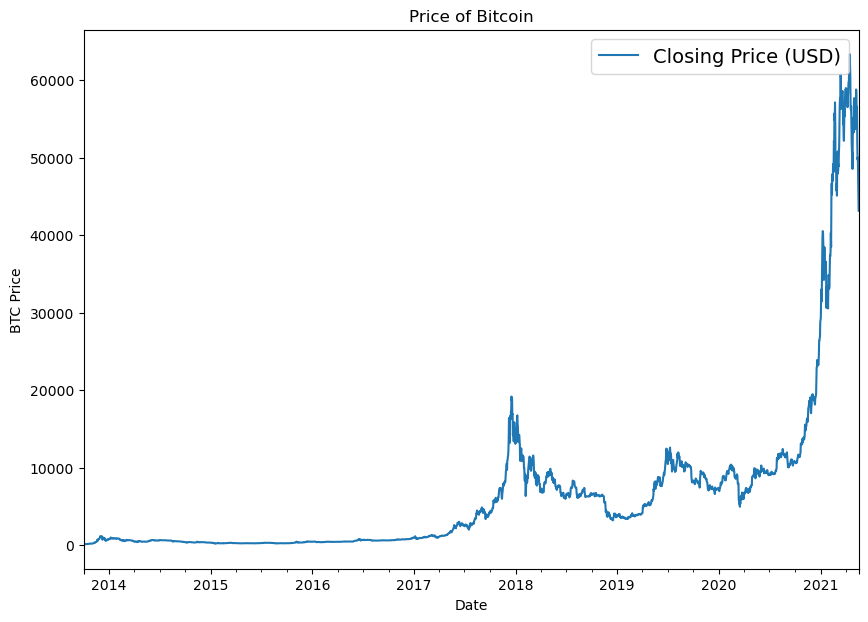

In [4]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin")
plt.legend(fontsize=14);

## Importing time series data with Python CSV module

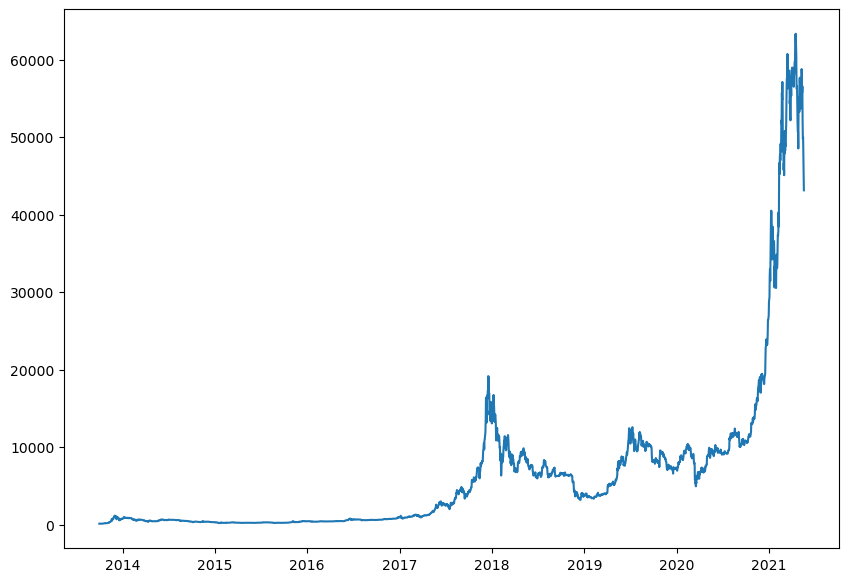

In [38]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
prices = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as file:
    csv_reader = csv.reader(file, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        prices.append(float(line[2]))
        
plt.figure(figsize=(10,7))
plt.plot(timesteps, prices);


## Create train and test sets for time series

In [6]:
split_size = int(0.8 * len(prices))

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

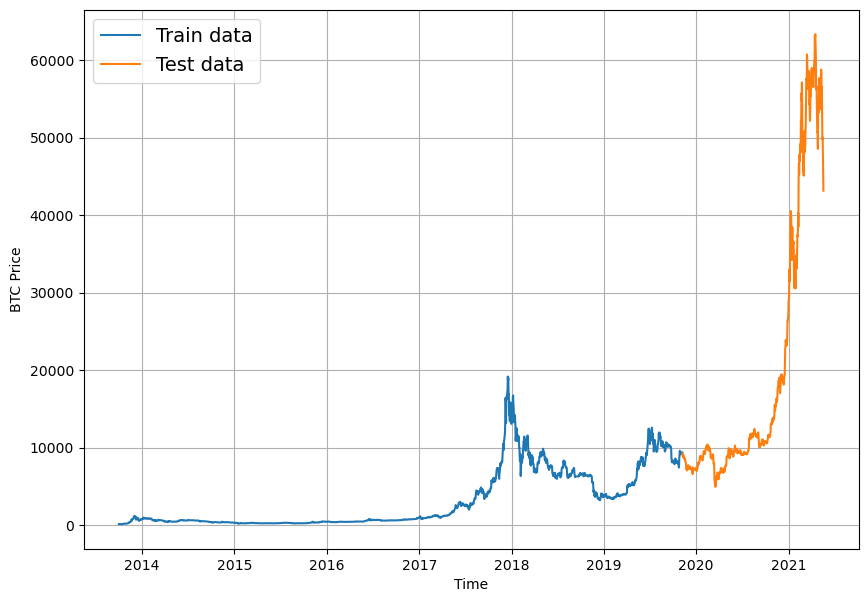

In [7]:
# Create a plotting function to plot our time series data
def plot_time_series(timesteps, values, format=".",start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
        
    plt.grid(True)

plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelling Experiments

* 1. Naive model (baseline)
* 2. Dense model
* 3. Same as model 1
* 4. Same as model 1
* 5. Conv1D
* 6. LSTM
* 7. Same as model 1 (but with multivariate data)
* 8. N-BEATS algorithm
* 9. Ensemble (multiple models stacked together)
* 10. Future prediction model
* 11. Same as model 1 (but with turkey data introduced

## Model 1: Create the baseline model (naive model)

In [8]:

naive_forecast = y_test[:-1]

naive_forecast[:3], naive_forecast[-3:]

([9226.4858208826, 8794.3586445233, 8798.0420546256],
 [50032.6931367648, 47885.6252547166, 45604.6157536131])

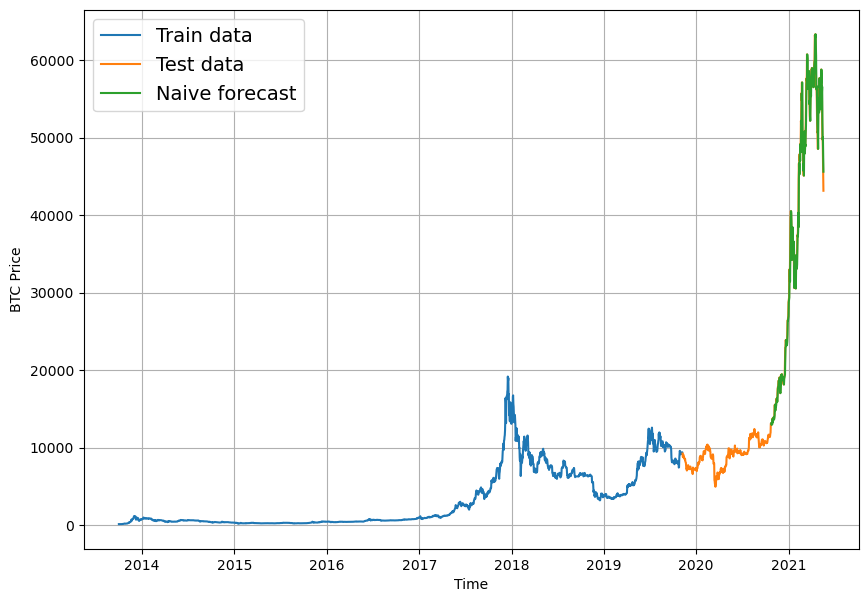

In [9]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

### Evaluating a time series model

Let's look into some evaluation metrics for time series

Since we're predicting a number we have a regression problem. Therefore we'll need some regression-like metrics

* MAE - mean absolute error
* MSE - mean squared error
* RMSE
* MAPE/sMAPE
* MASE


In [10]:
!pip install --ignore-installed --upgrade tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/dd/8a/76c34f0483a66e266c64c6110fa5b06004b8934fff3fcab65c218dd6e48c/tensorflow-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/98/35/844093df99983773f2c33be2f332047e1a531998f67da712358250cbf5e8/tensorflow_macos-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow_macos-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.2 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency info

  Obtaining dependency information for google-auth-oauthlib<2,>=0.5 from https://files.pythonhosted.org/packages/71/bf/9e125754d1adb3bc4bd206c4e5df756513b1d23675ac06caa471278d1f3f/google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata
  Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Obtaining dependency information for markdown>=2.6.8 from https://files.pythonhosted.org/packages/42/f4/f0031854de10a0bc7821ef9fca0b92ca0d7aa6fbfbf504c5473ba825e49c/Markdown-3.5.2-py3-none-any.whl.metadata
  Using cached Markdown-3.5.2-py3-none-any.whl.metadata (7.0 kB)
  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/cb/d3/a164038605494d49acc4f9cda1c0bc200b96382c53edd561387263bb181d/protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl.metadata
  Using cached protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl.metadata (540 bytes)
  Obtaining dependency inf

In [10]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/fredericstrand/Desktop/bitPredict/env/lib/python3.10/site-packages
Requires: tensorflow-macos
Required-by: 


In [11]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    # Ensure y_true and y_pred are tensors
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    # Calculate Mean Absolute Error (MAE)
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))  # Our seasonality is 1 day (hence the shifting of 1 day)

    # Calculate MASE
    return mae / mae_naive_no_season

In [12]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.99957

In [13]:
# Create a function to take in model predictions and truth values and return evalutation
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {"mae": mae.numpy(),
            "mape":mape.numpy(),
            "mse":mse.numpy(),
            "rmse":rmse.numpy(),
            "mase":mase.numpy()}

In [14]:
naive_results = evaluate_preds(y_true = y_test[1:],
                              y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.5165248,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mase': 0.99957}

# Windowing our dataset

We window our time series dataset to turn our data into a supervised learning problem

```
Windowing for one week
[0,1,2,3,4,5,6] -> [7]
[0,1,2,3,4,5,6,7] -> [8]
[0,1,2,3,4,5,6,7,8] -> [9]
```


In [21]:
y_train[:7], y_train[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [23]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # Predict next 1 day
WINDOW_SIZE = 7

In [25]:
# Create function to label windowed data
def get_labeled_window(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset
    
    E.g. if horizon=1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6],[7])
    """
    return x[:,:-horizon], x[:, -horizon:]

# Test out the window labelling function
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Oh yeah, that's what I'm talking about!

Now we need a way to make windows for an entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.

Let's write a function which:

1. Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Use NumPy indexing to create a 2D of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```

3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

📖 Resource: The function created below has been adapted from Syafiq Kamarul Azman's article Fast and Robust Sliding Window Vectorization with NumPy.

In [39]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of windows_size with horizon size labels.
    """
    # 1. Create a window of specific window_size( add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [40]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

TypeError: only integer scalar arrays can be converted to a scalar index